In [2]:
!pip install flask


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 1.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 309.5 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 3.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.1
    Uninstalling Werkzeug-3.0.1:
      Successfully uninstalled Werkzeug-3.0.1

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from flask import Flask, jsonify, request

In [13]:
import os

# Встановіть директорію, де можна записувати файли
os.chdir('/Users/mac/Documents/Univer/Crypto_lab/homes')

# Перевірка робочої директорії
print("Current working directory:", os.getcwd())







Current working directory: /Users/mac/Documents/Univer/Crypto_lab/homes


In [15]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
response = requests.get(url)

# Збереження файлу у доступній директорії
with open("/Users/mac/Documents/Univer/Crypto_lab/homes/housing.csv", "wb") as file:
    file.write(response.content)

# Завантаження файлу в pandas
data = pd.read_csv("/Users/mac/Documents/Univer/Crypto_lab/homes/housing.csv")
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [16]:
# Опис набору даних
print(data.info())

# Основні статистичні характеристики
print(data.describe())

# Перевірка на пропущені значення
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [18]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)



/var/folders/m6/cqv1zhq10ds_r6drrn1y2vzw0000gn/T/ipykernel_77937/3786100235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [19]:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [20]:
from sklearn.model_selection import train_test_split

# Вибір ознак і цільової змінної
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ініціалізація моделі
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Передбачення
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2404745975.124733
R^2 Score: 0.8164888965922015


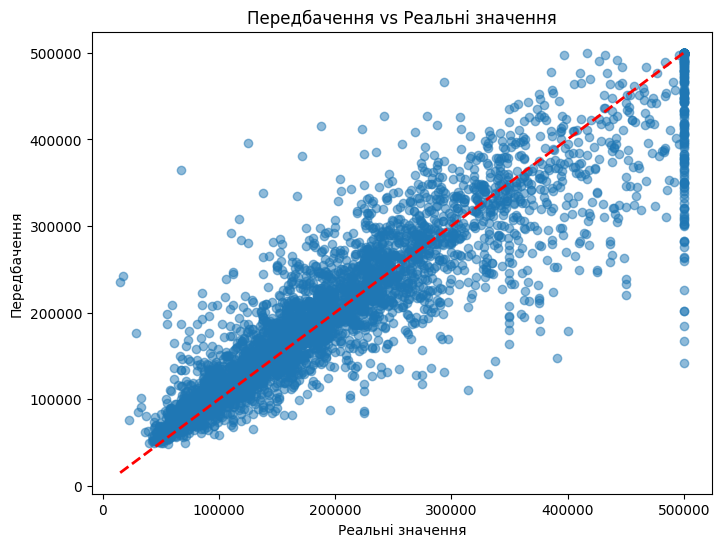

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Налаштування параметрів
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Найкращі параметри: {grid_search.best_params_}")


Найкращі параметри: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
